In [1]:
# Flow of model
#1. Data Acquisition: Obtain car dataset from a reliable source like Kaggle.
#2. Data Preprocessing: Clean the data, handle missing values, remove duplicates, and standardize formatting.
#3. Exploratory Data Analysis (EDA): Explore data distributions, correlations, and outliers.
#4 .Feature Selection: Identify relevant features for modeling.
#5. Model Development: Implement a baseline linear regression model.
#6. Model Evaluation: Evaluate model performance using metrics like R-squared score and mean absolute error.
#7. Model Refinement: Fine-tune hyperparameters and address overfitting, if necessary.
#8. Final Model Selection: Choose the best-performing model based on evaluation results.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


# Importing car data in CSV file

In [3]:
car=pd.read_csv('quikr_car.csv')

In [4]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car.shape

(892, 6)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


##### Creating backup copy

In [8]:
# make the backup of dataset
backup = car.copy()

# Quality
- year has many non-year values
- year object to int
- price has "Ask for Price"
- Price object to int
- kms_driven has kms with integers
- kms_driven object to int
- kms_driven has nan values
- fuel_type has nan values
- keep first 3 words of name

## Cleaning Data 

#### year has many non-year values

In [9]:
car['year'].unique() # there are so many irrelevant data in year column

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
car=car[car['year'].str.isnumeric()]

In [11]:
#car

#### year is in object. Change to integer

In [12]:
car['year'].unique()  # now we have only the numerical values in year column

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [13]:
car['year']=car['year'].astype(int)

In [14]:
#car.info()

#### Price has Ask for Price

In [15]:
car=car[car['Price']!='Ask For Price']

In [16]:
#car['Price'].unique()

#### Price has commas in its prices and is in object

In [17]:
car['Price'] = car['Price'].astype(str).str.replace(',', '').astype(int)


In [18]:
car["Price"]

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

####  kms_driven has object values with kms at last.

In [19]:
car['kms_driven'] = car['kms_driven'].astype(str).str.split().str.get(0).str.replace(',', '')


In [20]:
car["kms_driven"]

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


#### It has nan values and two rows have 'Petrol' in them

In [22]:
car=car[car['kms_driven'].str.isnumeric()]

In [23]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [24]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [25]:
car=car[~car['fuel_type'].isna()]

In [26]:
car.shape

(816, 6)

In [27]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [28]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [29]:
car=car.reset_index(drop=True)

## Cleaned Data

In [30]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [31]:
car.shape

(816, 6)

# some rows are removed by cleaning the data

In [32]:
car.to_csv('Cleaned_Car_data.csv')

In [33]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [34]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [35]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

# checking all the car Names

In [36]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

# check prices of all car companies

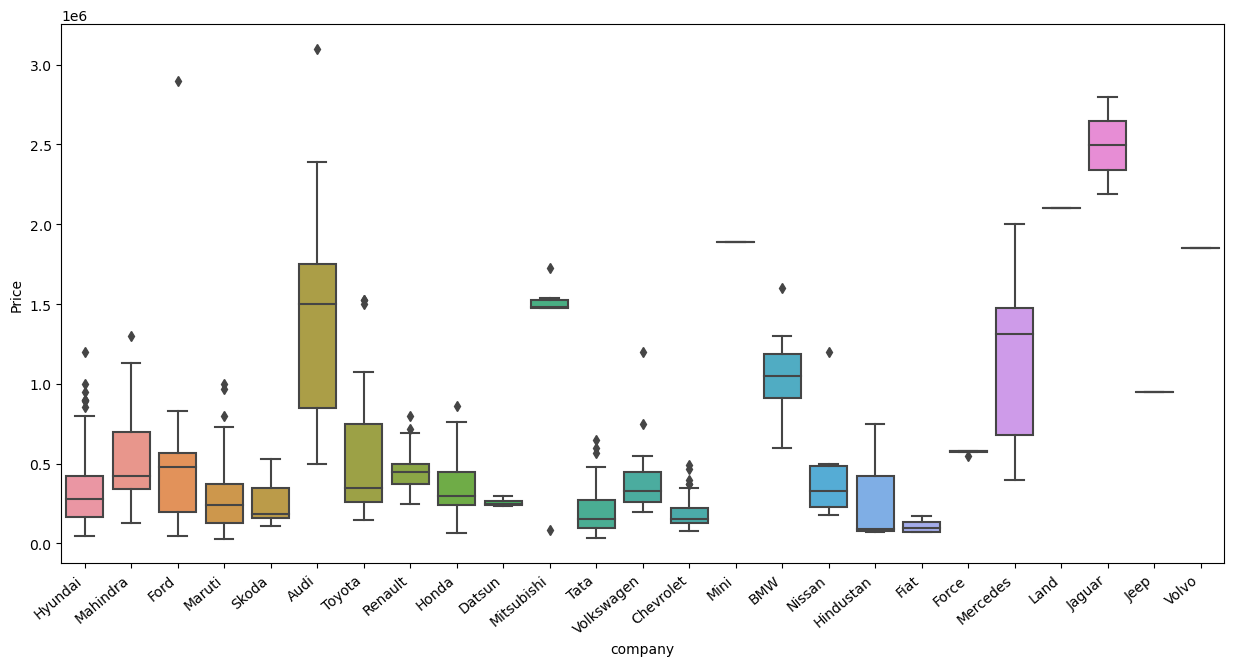

In [37]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\categorical.py

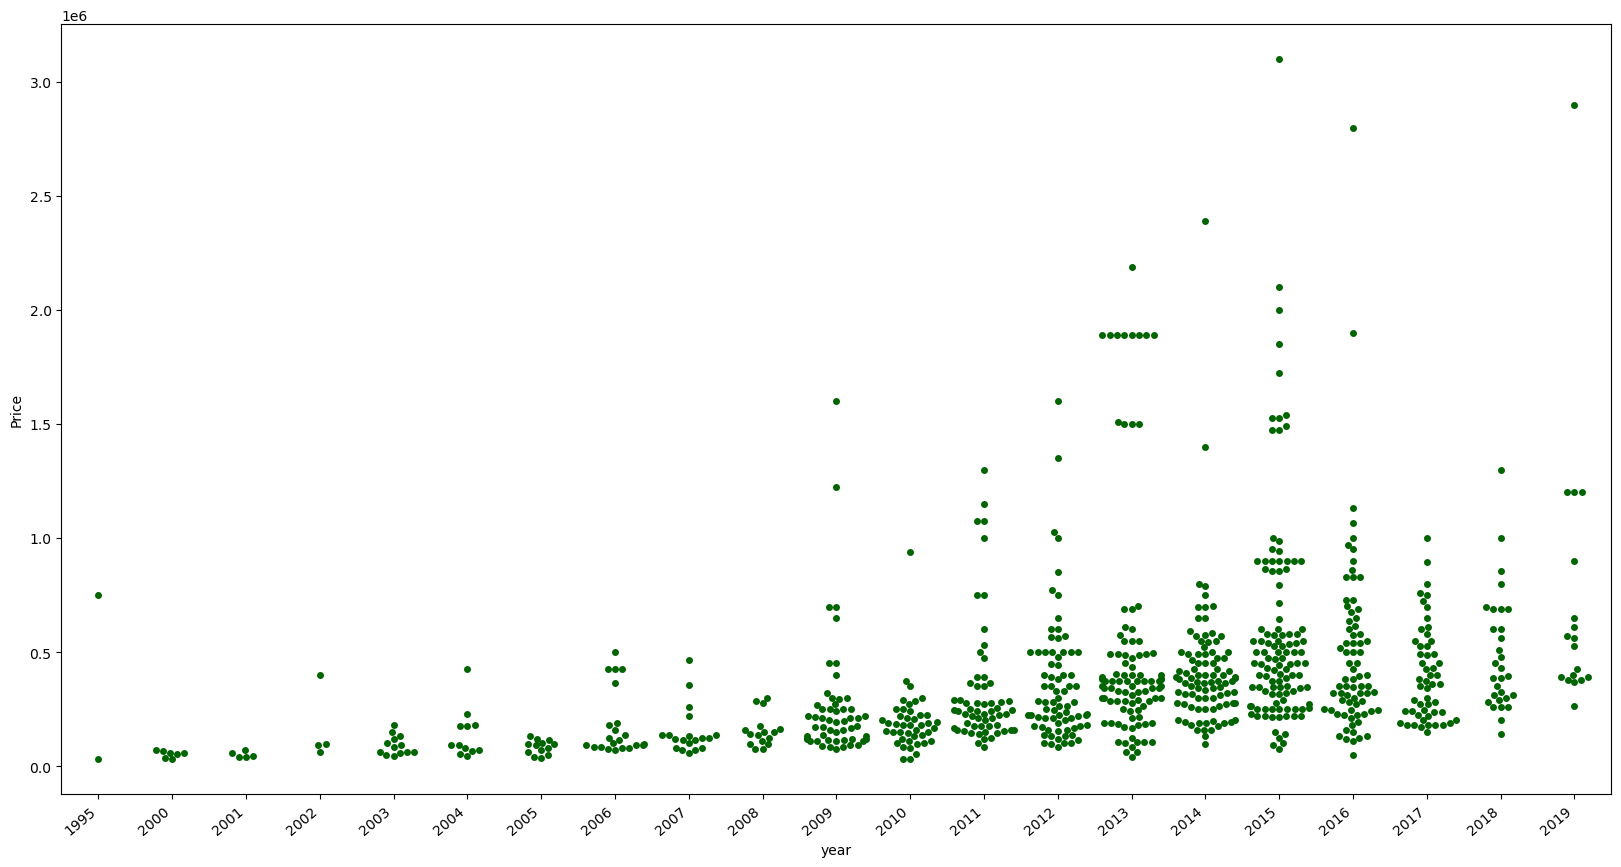

In [38]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car, color='darkgreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


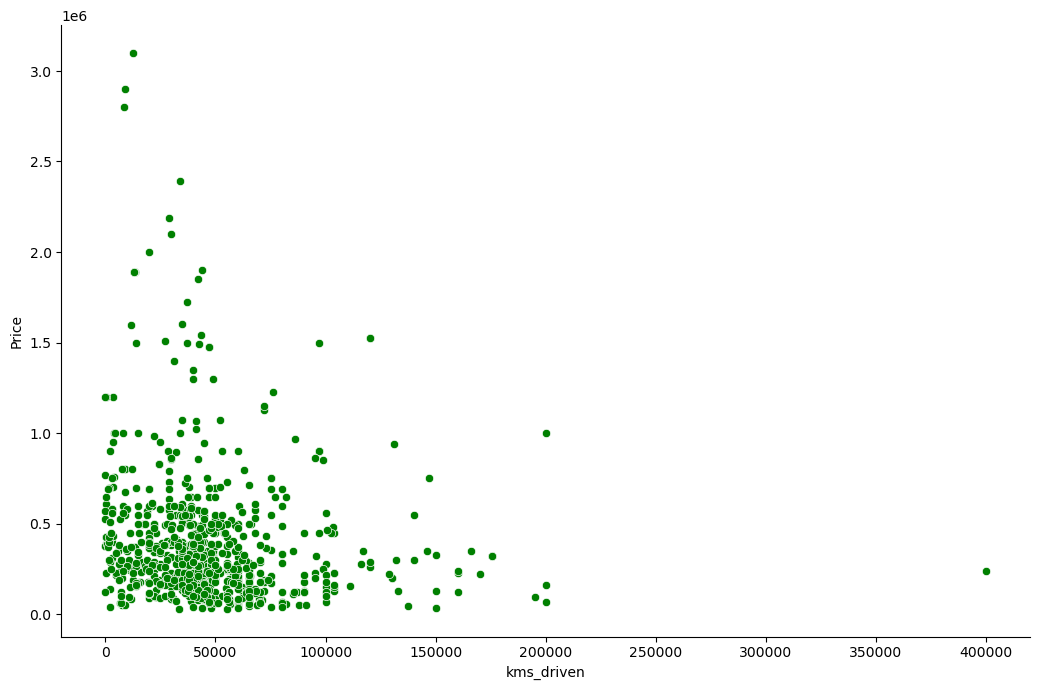

In [39]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5, color = 'green')

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

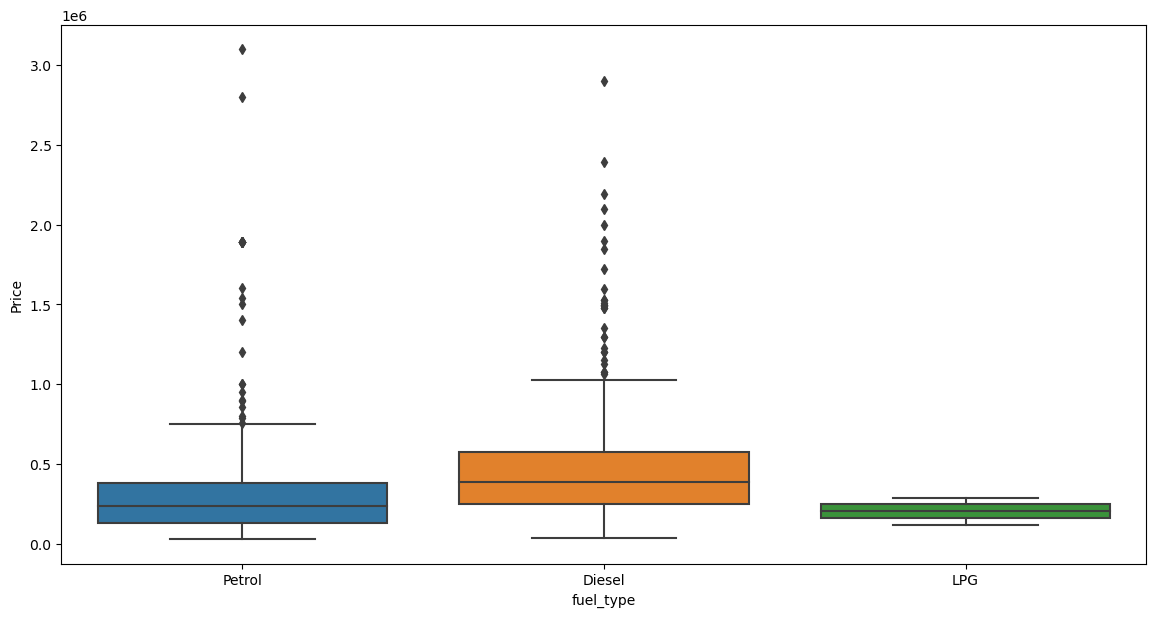

In [40]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

C:\Users\Kuldeep Yadav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


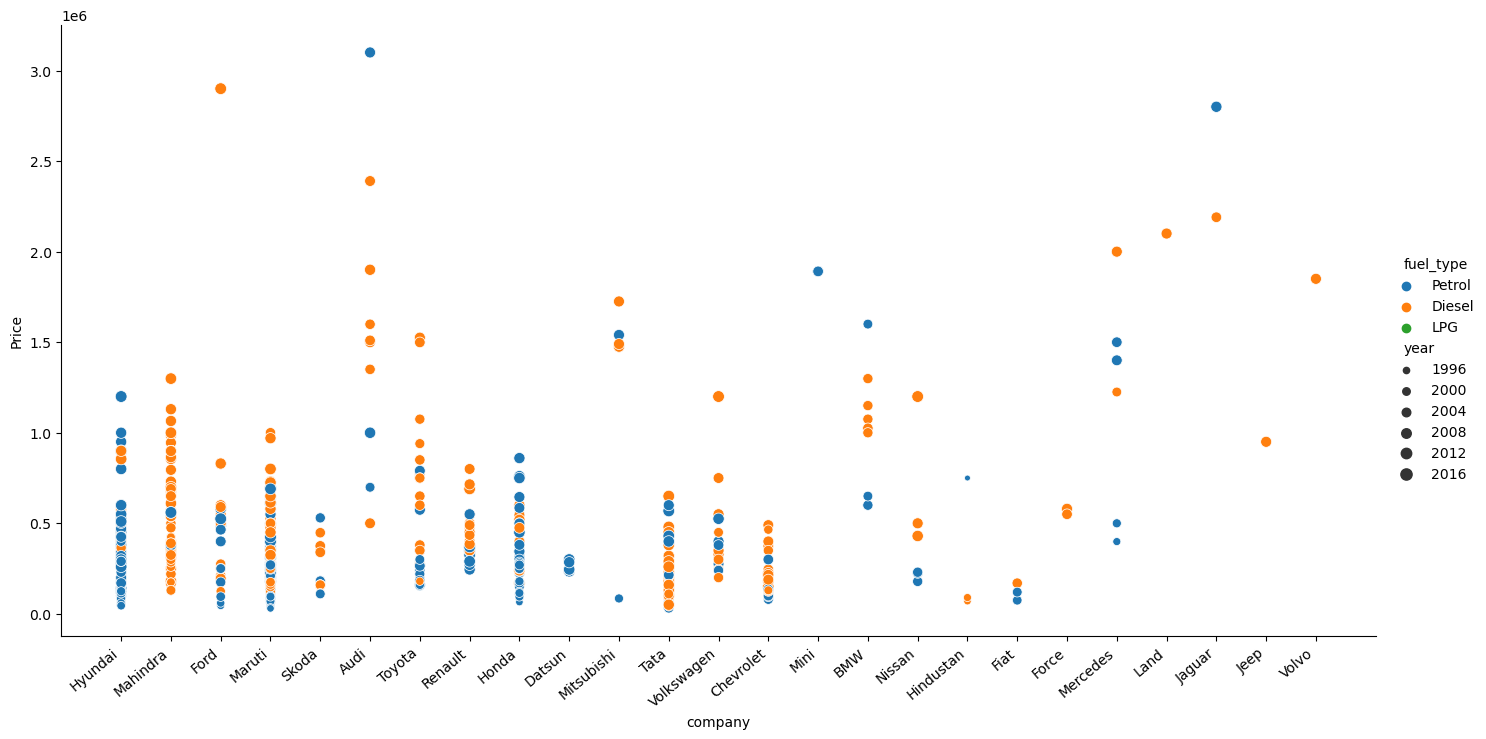

In [41]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [42]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [43]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [44]:
y.shape

(815,)

In [45]:
X.shape

(815, 5)

### Applying Train Test Split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Creating an OneHotEncoder object to contain all the possible categories

In [47]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [48]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [49]:
lr=LinearRegression()

#### Making a pipeline

In [50]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [52]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [53]:
r2_score(y_test,y_pred)

0.7290788780447834

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.84 as r2_score

In [54]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [55]:
np.argmax(scores)

433

In [56]:
scores[433]

0.8457042416667213

In [57]:
scores[np.argmax(scores)]

0.8457042416667213

In [58]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Dzire','Maruti',2012,40000,'Petrol']).reshape(1,5)))

array([295243.29902444])

#### The best model is found at a certain random state 

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7879315255423491

In [60]:
# Additional algorithms
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [61]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [62]:
# Support Vector Regression (SVR)
svr = SVR(kernel='rbf')


In [63]:
# XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


In [64]:
# K-Nearest Neighbors (KNN) Regressor
knn = KNeighborsRegressor()


In [65]:
# List of additional models
models = [('Random Forest', rf), ('Gradient Boosting', gb), ('SVR', svr), ('XGBoost', xgb), ('KNN', knn)]


In [66]:
# Dictionary to store R-squared scores
model_scores = {}


In [67]:
# Iterate over models and evaluate their performance
for name, model in models:
    print(f"Training {name}...")
    pipe = make_pipeline(column_trans, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R-squared score: {score:.4f}")
    model_scores[name] = score


Training Random Forest...
Random Forest R-squared score: 0.7841
Training Gradient Boosting...
Gradient Boosting R-squared score: 0.7663
Training SVR...
SVR R-squared score: -0.0685
Training XGBoost...
XGBoost R-squared score: 0.8466
Training KNN...
KNN R-squared score: 0.2055


In [68]:
# Find the best-performing model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]


In [69]:
print(f"\nBest-performing model: {best_model_name} with R-squared score of {best_model_score:.4f}")



Best-performing model: XGBoost with R-squared score of 0.8466


In [70]:
# Selecting the best-performing model
best_model = None
for name, model in models:
    if name == best_model_name:
        best_model = model
        break


In [71]:
# Training the best model on the entire dataset
pipe_best = make_pipeline(column_trans, best_model)
pipe_best.fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [72]:
# Making predictions
predicted_price = pipe_best.predict(pd.DataFrame(columns=X.columns,
                                                  data=np.array(['Maruti Suzuki Dzire','Maruti',2012,40000,'Petrol']).reshape(1, 5)))


In [73]:
print("Predicted price with the best model:", predicted_price)


Predicted price with the best model: [265470.88]


In [74]:
row_exists = car[(car['name'] == 'Maruti Suzuki Dzire') & 
                 (car['company'] == 'Maruti') & 
                 (car['year'] == 2012) & 
                 (car['kms_driven'] == 40000) & 
                 (car['fuel_type'] == 'Petrol')]

if not row_exists.empty:
    print("Row exists in the DataFrame.")
    print(row_exists)
else:
    print("Row does not exist in the DataFrame.")

Row exists in the DataFrame.
                    name company  year   Price  kms_driven fuel_type
298  Maruti Suzuki Dzire  Maruti  2012  299999       40000    Petrol


In [76]:
import pickle

# Assuming 'pipe' is your trained pipeline
with open('LinearRegressionModel.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [78]:
import pickle
import pandas as pd
import numpy as np

# Load the trained model
with open('LinearRegressionModel.pkl', 'rb') as f:
    model = pickle.load(f)

# Make a prediction
sample_input = pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'], 
                            data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5))
predicted_price = model.predict(sample_input)
print("Predicted price:", predicted_price[0])

# Safely access the categories for debugging purposes
try:
    ohe = model.steps[0][1].transformers[0][1]
    if hasattr(ohe, 'categories_'):
        print("Categories:", ohe.categories_[0])
    else:
        print("The OneHotEncoder object does not have the 'categories_' attribute.")
except Exception as e:
    print(f"An error occurred while accessing categories: {e}")

# Make another prediction with a slightly different data frame construction
sample_input_2 = pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], 
                              columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])
predicted_price_2 = model.predict(sample_input_2)
print("Predicted price 2:", predicted_price_2[0])


Predicted price: 461000.0
The OneHotEncoder object does not have the 'categories_' attribute.
Predicted price 2: 461000.0


In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [54]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([429547.05827681])

In [55]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [56]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']], columns=['name','company','year','kms_driven','fuel_type']))

array([429547.05827681])